# Car Price Predictor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car = pd.read_csv('CarPrice.csv')

In [3]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.shape

(205, 26)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 1. Data Preprocessing

In [6]:
Backup = car.copy()

In [7]:
car['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [8]:
car['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [9]:
car['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [10]:
car['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [11]:
car['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [12]:
car['horsepower'].unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106], dtype=int64)

In [13]:
car['price'].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

In [14]:
car = car[["CarName","fueltype","carbody","drivewheel","enginetype","horsepower","price"]]

In [15]:
car

,CarName,fueltype,carbody,drivewheel,enginetype,horsepower,price
0,alfa-romero giulia,gas,convertible,rwd,dohc,111,13495.0
1,alfa-romero stelvio,gas,convertible,rwd,dohc,111,16500.0
2,alfa-romero Quadrifoglio,gas,hatchback,rwd,ohcv,154,16500.0
3,audi 100 ls,gas,sedan,fwd,ohc,102,13950.0
4,audi 100ls,gas,sedan,4wd,ohc,115,17450.0
...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,sedan,rwd,ohc,114,16845.0
201,volvo 144ea,gas,sedan,rwd,ohc,160,19045.0
202,volvo 244dl,gas,sedan,rwd,ohcv,134,21485.0
203,volvo 246,diesel,sedan,rwd,ohc,106,22470.0


In [16]:
car.rename(columns = {"CarName" : "carname"}, inplace=True)

In [17]:
car

,carname,fueltype,carbody,drivewheel,enginetype,horsepower,price
0,alfa-romero giulia,gas,convertible,rwd,dohc,111,13495.0
1,alfa-romero stelvio,gas,convertible,rwd,dohc,111,16500.0
2,alfa-romero Quadrifoglio,gas,hatchback,rwd,ohcv,154,16500.0
3,audi 100 ls,gas,sedan,fwd,ohc,102,13950.0
4,audi 100ls,gas,sedan,4wd,ohc,115,17450.0
...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,sedan,rwd,ohc,114,16845.0
201,volvo 144ea,gas,sedan,rwd,ohc,160,19045.0
202,volvo 244dl,gas,sedan,rwd,ohcv,134,21485.0
203,volvo 246,diesel,sedan,rwd,ohc,106,22470.0


In [18]:
car.describe()

,horsepower,price
count,205.000000,205.000000
mean,104.117073,13276.710571
std,39.544167,7988.852332
min,48.000000,5118.000000
25%,70.000000,7788.000000
50%,95.000000,10295.000000
75%,116.000000,16503.000000
max,288.000000,45400.000000


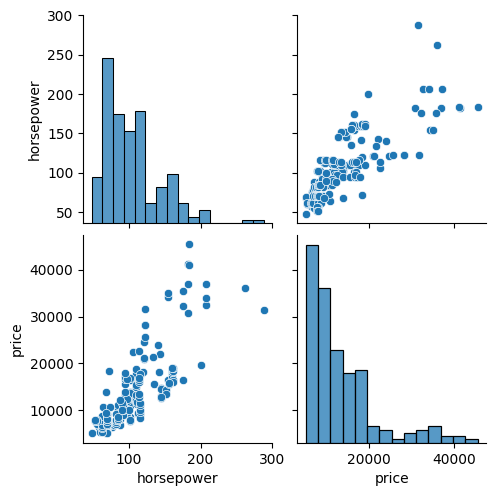

In [19]:
sns.pairplot(car)

In [20]:
# outliers in price
car[car["price"]> 40000.00]

,carname,fueltype,carbody,drivewheel,enginetype,horsepower,price
16,bmw x5,gas,sedan,rwd,ohc,182,41315.0
73,buick century special,gas,sedan,rwd,ohcv,184,40960.0
74,buick regal sport coupe (turbo),gas,hardtop,rwd,ohcv,184,45400.0


In [21]:
car = car[car["price"]<=40000.00]
car.head()

,carname,fueltype,carbody,drivewheel,enginetype,horsepower,price
0,alfa-romero giulia,gas,convertible,rwd,dohc,111,13495.0
1,alfa-romero stelvio,gas,convertible,rwd,dohc,111,16500.0
2,alfa-romero Quadrifoglio,gas,hatchback,rwd,ohcv,154,16500.0
3,audi 100 ls,gas,sedan,fwd,ohc,102,13950.0
4,audi 100ls,gas,sedan,4wd,ohc,115,17450.0


In [22]:
# outliers in horsepower
car[car["horsepower"]>250.00]

,carname,fueltype,carbody,drivewheel,enginetype,horsepower,price
49,jaguar xk,gas,sedan,rwd,ohcv,262,36000.0
129,porsche cayenne,gas,hatchback,rwd,dohcv,288,31400.5


In [23]:
car = car[car["horsepower"]<=250.00]
car.head()

,carname,fueltype,carbody,drivewheel,enginetype,horsepower,price
0,alfa-romero giulia,gas,convertible,rwd,dohc,111,13495.0
1,alfa-romero stelvio,gas,convertible,rwd,dohc,111,16500.0
2,alfa-romero Quadrifoglio,gas,hatchback,rwd,ohcv,154,16500.0
3,audi 100 ls,gas,sedan,fwd,ohc,102,13950.0
4,audi 100ls,gas,sedan,4wd,ohc,115,17450.0


In [24]:
car.describe()

,horsepower,price
count,200.00000,200.000000
mean,101.22000,12633.250835
std,34.71031,6912.080946
min,48.00000,5118.000000
25%,70.00000,7775.000000
50%,95.00000,10096.500000
75%,116.00000,16106.000000
max,207.00000,37028.000000


In [25]:
car.shape

(200, 7)

## 2. Exploratory Data Analysis (EDA)

In [26]:
car.head()

,carname,fueltype,carbody,drivewheel,enginetype,horsepower,price
0,alfa-romero giulia,gas,convertible,rwd,dohc,111,13495.0
1,alfa-romero stelvio,gas,convertible,rwd,dohc,111,16500.0
2,alfa-romero Quadrifoglio,gas,hatchback,rwd,ohcv,154,16500.0
3,audi 100 ls,gas,sedan,fwd,ohc,102,13950.0
4,audi 100ls,gas,sedan,4wd,ohc,115,17450.0


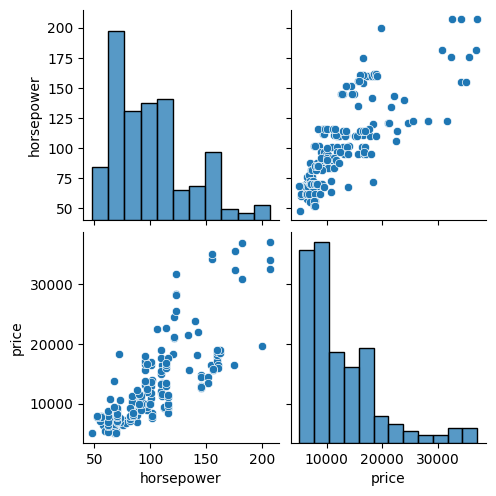

In [27]:
sns.pairplot(car)

<AxesSubplot: xlabel='price', ylabel='Count'>

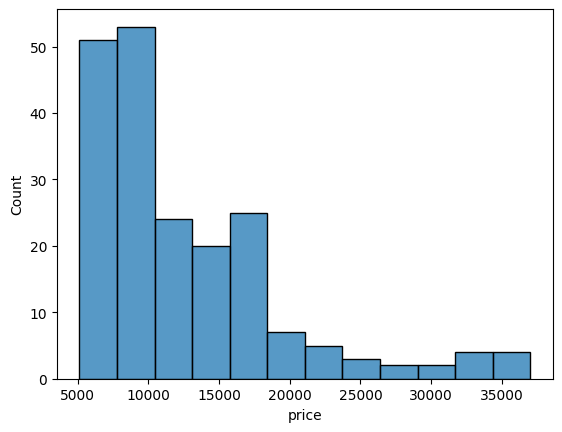

In [28]:
sns.histplot(car["price"])

<AxesSubplot: xlabel='horsepower', ylabel='Count'>

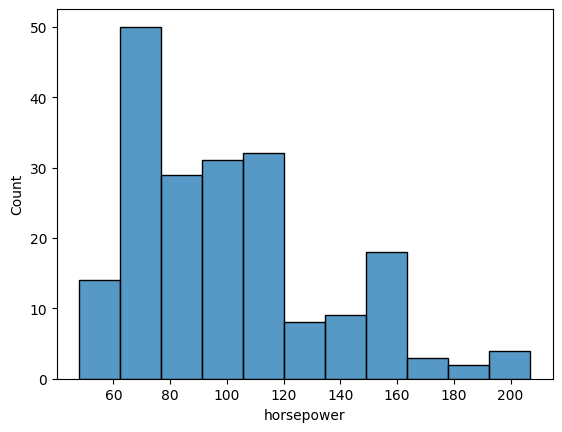

In [29]:
sns.histplot(car["horsepower"])

In [30]:
car.to_csv("Cleaned_CarPrice.csv")

## 3. Model Building

In [31]:
X = car.drop(columns = "price")
Y = car["price"]

In [32]:
X.head()

,carname,fueltype,carbody,drivewheel,enginetype,horsepower
0,alfa-romero giulia,gas,convertible,rwd,dohc,111
1,alfa-romero stelvio,gas,convertible,rwd,dohc,111
2,alfa-romero Quadrifoglio,gas,hatchback,rwd,ohcv,154
3,audi 100 ls,gas,sedan,fwd,ohc,102
4,audi 100ls,gas,sedan,4wd,ohc,115


In [33]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [36]:
ohe = OneHotEncoder(drop="first",handle_unknown='ignore')
ohe.fit(X[["carname","fueltype","carbody","drivewheel","enginetype"]])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [37]:
column_trans = make_column_transformer((OneHotEncoder( categories=ohe.categories_), ["carname", "fueltype", "carbody", "drivewheel", "enginetype"]), remainder="passthrough")

In [38]:
lr = LinearRegression()

In [39]:
pipe = make_pipeline(column_trans, lr)

In [40]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
       'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000',
       'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i',
       'bmw x1', 'bmw x3', 'bmw x4', 'bmw z4', 'buick ce...
       'volvo 264gl', 'volvo diesel', 'vw dasher', 'vw rabbit'],
      dtype=object),
                                                                            array(['diesel', 'gas'], dtype=object),
                                                                            array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object),
                                                                            array(['4wd', 'fwd', 'rwd'], dtype=object),
                                                                            array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]),
                                                  ['carname', 'fueltype',
                                                   'carbody', 'drivewheel',
                                                   'enginetype'])])),
                ('linearregression', LinearRegression())])

In [41]:
Y_pred = pipe.predict(X_test)
Y_pred

array([15459.94329067,  6809.8865395 , 10018.4482707 , 12668.152682  ,
       17741.68938942,  9096.26076737, 16925.1162593 , 17748.08610745,
       12616.4217614 , 10363.23756997, 13408.04345183,  6849.13459301,
       30432.15299532, 11348.03758455, 18029.68174312, 18906.87339162,
        9201.95944878, 12584.31725372, 20840.19790501, 13408.04345183,
        9022.66659365,  8990.56208597, 17747.94620566,  7944.07932179,
       11769.555445  , 19220.41976448,  9878.15973723, 14647.32699937,
        9022.66659365, 21910.94079929, 10787.43966984, 10131.35150719,
       17920.41669436, 11245.01835239, 13591.81367558, 19147.87675535,
       15007.80352151, 19146.07078473, 22338.48665098, 13301.5680958 ])

In [42]:
r2_score(Y_test, Y_pred)

0.43758098023180503

In [43]:
scores = []
for i in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    scores.append(r2_score(Y_test, Y_pred))

In [44]:
np.argmax(scores)

371

In [45]:
scores[np.argmax(scores)]

0.8001536608852933

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)
r2_score(Y_test, Y_pred)

0.8001536608852933

In [48]:
import pickle

In [49]:
pickle.dump(pipe, open("cpp.pkl", "wb"))